M2 AMSS - Proof-of-Concept

# Python lab — Answer keys

by Bruno DENIS, ENS Paris-Saclay

This notebook presents a python module maned `my_stl_module` to analyse the content of a "tiny paper" using proof-of-concept.

Warning: getting and building a benchmark dataset is not presented here.

## Import of Python modules

To display `matplotlib` figure in jupyter notebook, `matplotlib.pyplot` module is required.

In [2]:
import matplotlib.pyplot as plt

To display again the same `matplotlib` after some change in jupyter notebook, `IPython.display` module is required.

In [3]:
import IPython.display

And finally, the specific module developed for the proof-of-concept is loaded.

import my_stl_module  # module implemented for the proof-of-concept

## Modelisation

Three classes have been implemented into `my_stl_module`: 
- Vetex - corner of triangle defined by with 3 coordinates,
- Facet - elementary triangular plane surface defined with 3 vertices,
- Solid - 3-D surface defined as the union of triangular facets joined by an elementary edge.

![Principle](img/stl_principle2.svg)

```{mermaid}
classDiagram
    Solid "n" - "n" Facet : contains >
    Facet "n" - "3" Vertex : contains >

    class Solid {
        str _name
        void add_facet()
        void add_facet_list()
        list get_all_points()
        list get_all_facets()
        list intersection_with_plan()
    }

    class Facet {
        Vertex v1azer
        Vertex v2
        Vertex v3
        list intersection_with_plan()
    }

    class Vertex {
        float x
        float y
        float z
    }
```

![](img/class_diagram.png)

## Cube case study

This subsection shows:
- step by step solid creation from scratch (a 1x1x1 cube)
- `matplotlib` usage from illustration


![illustration](img/cube_20.0x+3.0y+5.0z=14.0.png)

To display cube building step by step, a Matplotlib `Figure` (named `fig`) is created with a single Matplotlib `axes` (maned `ax`) to plot 3D representation of vertices, facets and solid.

Text(0.5, 0, 'z')

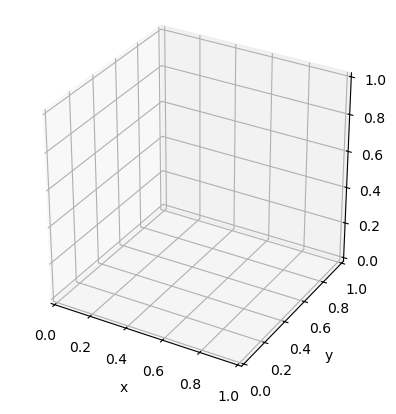

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect((1, 1, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

8 points are created from their xyz-coordinates.

In [7]:
v000 = my_stl_module.Vertex(0, 0, 0)
v100 = my_stl_module.Vertex(1, 0, 0)
v010 = my_stl_module.Vertex(0, 1, 0)
v110 = my_stl_module.Vertex(1, 1, 0)
v001 = my_stl_module.Vertex(0, 0, 1)
v101 = my_stl_module.Vertex(1, 0, 1)
v011 = my_stl_module.Vertex(0, 1, 1)
v111 = my_stl_module.Vertex(1, 1, 1)

vertices = [
    v000, v100, v010, v110, 
    v001, v101, v011, v111,
]

Illustration of 8 vertices (added to previous illustration)

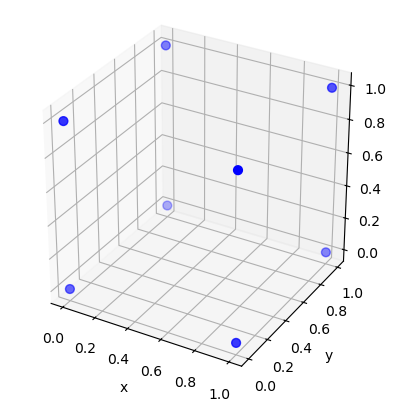

In [8]:
ax.scatter(
    [v.x for v in vertices], 
    [v.y for v in vertices],
    [v.z for v in vertices], 
    s=40,  # markersize
    color="blue",
)
IPython.display.display(fig)

12 facets are created from existing vertices (2 triangles for each cube faces)

In [9]:
f1a = my_stl_module.Facet(v000, v010, v110)
f1b = my_stl_module.Facet(v000, v100, v110)
f6a = my_stl_module.Facet(v001, v011, v111)
f6b = my_stl_module.Facet(v001, v101, v111)
f2a = my_stl_module.Facet(v000, v010, v011)
f2b = my_stl_module.Facet(v000, v001, v011)
f5a = my_stl_module.Facet(v100, v110, v111)
f5b = my_stl_module.Facet(v100, v101, v111)
f3a = my_stl_module.Facet(v000, v100, v101)
f3b = my_stl_module.Facet(v000, v001, v101)
f4a = my_stl_module.Facet(v010, v110, v111)
f4b = my_stl_module.Facet(v010, v011, v111)

facets = [
    f1a, f1b, f2a, f2b, f3a, f3b,
    f4a, f4b, f5a, f5b, f6a, f6b,
]

Illustration of 1 facet out of 12 (added to previous illustration)

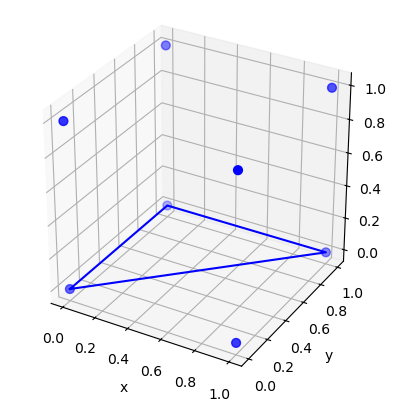

In [10]:
ax.plot(
    [f1a.v1.x, f1a.v2.x, f1a.v3.x, f1a.v1.x], 
    [f1a.v1.y, f1a.v2.y, f1a.v3.y, f1a.v1.y], 
    [f1a.v1.z, f1a.v2.z, f1a.v3.z, f1a.v1.z], 
    color="blue",
)
IPython.display.display(fig)

Solid creation from facet list

In [11]:
solid = my_stl_module.Solid(name="cube")
solid.add_facet_list(facets)

print(solid)

cube with 12 facets


Illustration of whole solid (added to previous illustration)

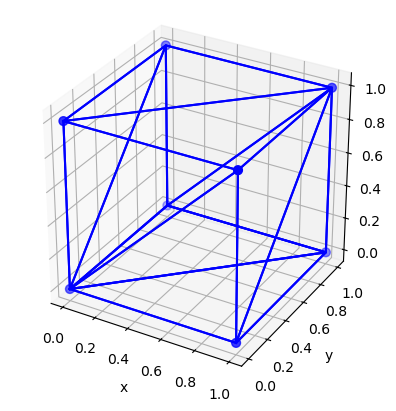

In [12]:
for facet in solid.get_all_facets():
    ax.plot(
        [facet.v1.x, facet.v2.x, facet.v3.x, facet.v1.x],
        [facet.v1.y, facet.v2.y, facet.v3.y, facet.v1.y],
        [facet.v1.z, facet.v2.z, facet.v3.z, facet.v1.z],
        color="blue"
    )
IPython.display.display(fig)

Set plan for intersection

In [13]:
a, b, c, d = 20, 3, 5, 14

Set final figure title

In [14]:
plan_equation = f"{a:.1f}x{b:+.1f}y{c:+.1f}z={d:.1f}"

title = f"Intersection between a {solid.name} and\n"
title += f"the plan ${plan_equation}$"

ax.set_title(title)

Text(0.5, 0.92, 'Intersection between a cube and\nthe plan $20.0x+3.0y+5.0z=14.0$')

build solid/plan intersection

In [15]:
line_segment_list = solid.intersection_with_plan(a, b, c, d)

print(line_segment_list)
print()
print(title)
print(f"gives {len(line_segment_list)} line segments")

[[(0.55, 0.6086956521739131), (1.0, 0.6086956521739131), (0.0, 0.0)], [(0.7, 0.6086956521739131), (0.0, 0.6086956521739131), (0.0, 0.0)], [(0.7, 0.56), (0.0, 0.0), (0.0, 0.56)], [(0.45, 0.56), (0.0, 0.0), (1.0, 0.56)], [(0.55, 0.43999999999999995), (1.0, 1.0), (0.0, 0.43999999999999995)], [(0.3, 0.43999999999999995), (1.0, 1.0), (1.0, 0.43999999999999995)], [(0.3, 0.3913043478260869), (1.0, 0.3913043478260869), (1.0, 1.0)], [(0.45, 0.3913043478260869), (0.0, 0.3913043478260869), (1.0, 1.0)]]

Intersection between a cube and
the plan $20.0x+3.0y+5.0z=14.0$
gives 8 line segments


Illustration of intersection (added to previous illustration)

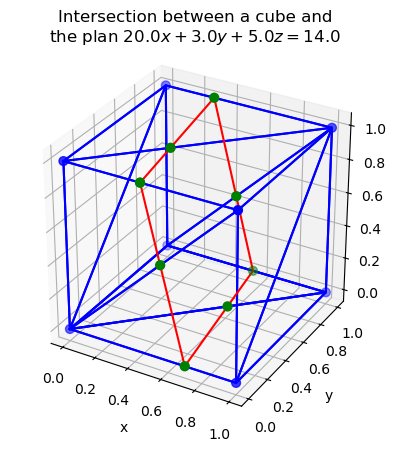

In [16]:
for line_segment in line_segment_list:
    ax.plot(*line_segment, color="red")  # line segments
    ax.scatter(*line_segment, s=40, color="green")  # point
IPython.display.display(fig)

## Chess pawn case study

This subsection shows:
- loading solid from file (a 1x1x1 cube)
- `matplotlib` usage from `figure` with two `axes`

![illustration](img/chess_pawn_7.0x-1.0y+2.0z=16.0.svg)

Create an empty object and load data from a file

In [17]:
solid = my_stl_module.Solid()
solid.import_ascii("dataset/chess_pawn/chess_pawn_ascii.stl")

print(solid)

chess_pawn with 1344 facets


Prepare `Matplotlib` figure

Text(0.5, 0.92, 'Focus on a detail')

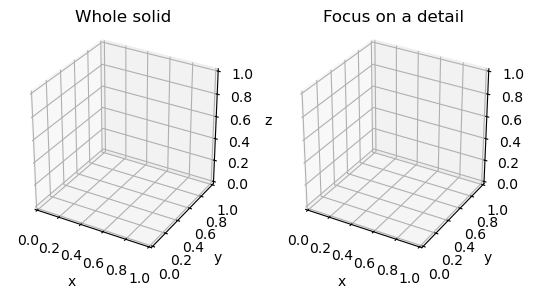

In [18]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

axs[0].set_box_aspect((1, 1, 1))
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_zlabel("z")
axs[0].set_title("Whole solid")

axs[1].set_box_aspect((1, 1, 1))
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_zlabel("z")
axs[1].set_title("Focus on a detail")

Plot triangle of each facet of the chess pawn solid (added to previous illustration)

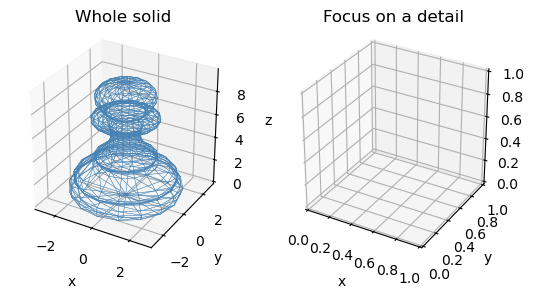

In [19]:
for facet in solid.get_all_facets():
    axs[0].plot(
        [facet.v1.x, facet.v2.x, facet.v3.x, facet.v1.x],
        [facet.v1.y, facet.v2.y, facet.v3.y, facet.v1.y],
        [facet.v1.z, facet.v2.z, facet.v3.z, facet.v1.z],
        color="steelblue",
        linewidth=0.25
    )
IPython.display.display(fig)

Ajuste `ax[0]` ratio to fit to solid

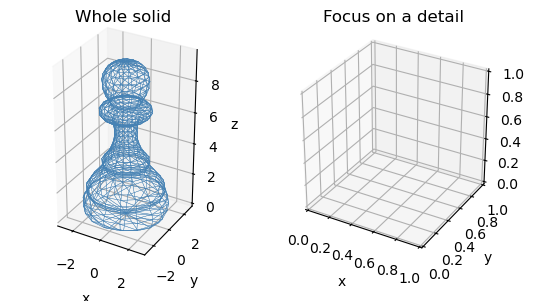

In [20]:
(x_min, x_max, y_min, y_max, z_min, z_max) = solid.bounding_box()
axs[0].set_box_aspect((x_max - x_min, y_max - y_min, z_max - z_min))
IPython.display.display(fig)

Set plan for intersection


In [21]:
a, b, c, d = 7, -1, 2, 16

build solid/plan intersection

In [22]:
line_segment_list = solid.intersection_with_plan(a, b, c, d)

print(f"Intersection between a {solid.name} and")
print(f"the plan {a:.1f}x{b:+.1f}y{c:+.1f}z={d:.1f}")
print(f"gives {len(line_segment_list)} line segments")

Intersection between a chess_pawn and
the plan 7.0x-1.0y+2.0z=16.0
gives 176 line segments


Illustration of intersection (added to previous illustration)

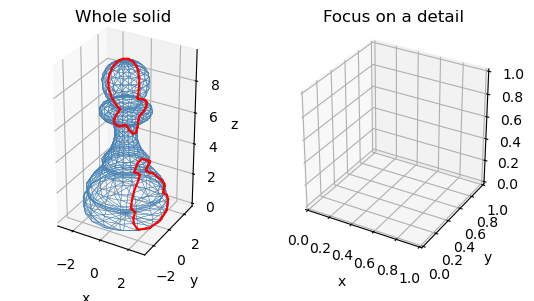

In [23]:
for line_segment in line_segment_list:
    axs[0].plot(*line_segment, color="red")  # line segments
IPython.display.display(fig)

Define a region of interest to zoom in

In [24]:
x_min, x_max = +0.5, +3.5
y_min, y_max = -3.0, -0.0
z_min, z_max = +0.0, +5.0

Build a new solid, intersection between 1st solid and region of interest

In [25]:
extracted_solid = solid.extract(
    x_min, x_max, y_min, y_max, z_min, z_max
)
print(extracted_solid)

chess_pawn_extract with 96 facets


Plot de extracted solid (added to previous illustration)

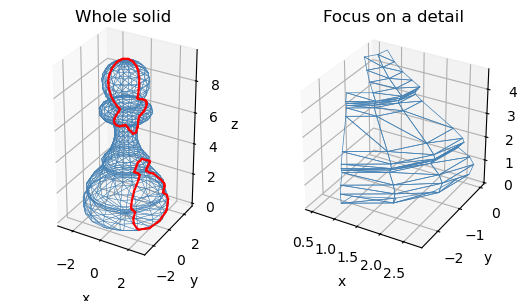

In [26]:
for facet in extracted_solid.get_all_facets():
    axs[1].plot(
        [facet.v1.x, facet.v2.x, facet.v3.x, facet.v1.x],
        [facet.v1.y, facet.v2.y, facet.v3.y, facet.v1.y],
        [facet.v1.z, facet.v2.z, facet.v3.z, facet.v1.z],
        color="steelblue",
        linewidth=0.5
    )
IPython.display.display(fig)

Ajuste `ax[1]` ratio to fit to extracted solid

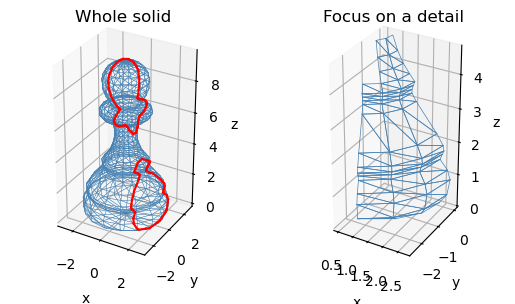

In [27]:
(x_min, x_max, y_min, y_max, z_min, z_max) = extracted_solid.bounding_box()
axs[1].set_box_aspect((x_max - x_min, y_max - y_min, z_max - z_min))
IPython.display.display(fig)

build extarcted solid/plan intersection

In [28]:
line_segment_list = extracted_solid.intersection_with_plan(a, b, c, d)

print(f"Intersection between a {extracted_solid.name} and")
print(f"the plan {a:.1f}x{b:+.1f}y{c:+.1f}z={d:.1f}")
print(f"gives {len(line_segment_list)} line segments")

Intersection between a chess_pawn_extract and
the plan 7.0x-1.0y+2.0z=16.0
gives 34 line segments


Illustration of zoomed intersection (added to previous illustration)

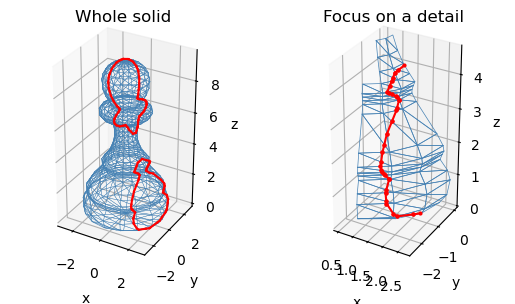

In [29]:
for line_segment in line_segment_list:
    axs[1].plot(
        *line_segment, 
        color="red", 
        marker='o', 
        markersize=2
    )
IPython.display.display(fig)

## Performances

### Building a set of solid from dataset

`solid`, `a`, `b`, `c` and `d` are dictionnary where keys are number of study case and values are respectivement a Solid and parameters of plan equation $ax + bx + cy = d$

In [30]:
solid, a, b, c, d = {}, {}, {}, {}, {}

The following function, `plot_intersection()` display interscetion of case studies.

In [31]:
def plot_intersection(solid, a, b, c, d):
    """Plots solid and intersection with plan ax+by+cz=d."""
    (x_min, x_max, y_min, y_max, z_min, z_max) = solid.bounding_box()
    line_segment_list = solid.intersection_with_plan(a, b, c, d)
    print(len(line_segment_list), "segments intersetion")
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect((1, 1, 1))
    ax.set_box_aspect((x_max - x_min, y_max - y_min, z_max - z_min))
    for facet in solid.get_all_facets():
        ax.plot(
            [facet.v1.x, facet.v2.x, facet.v3.x, facet.v1.x],
            [facet.v1.y, facet.v2.y, facet.v3.y, facet.v1.y],
            [facet.v1.z, facet.v2.z, facet.v3.z, facet.v1.z],
            color="steelblue",
            linewidth=0.25
        )
    for line_segment in line_segment_list:
        ax.plot(*line_segment, color="red")

Case study #0

sphere_poly12 with 140 facets
40 segments intersetion


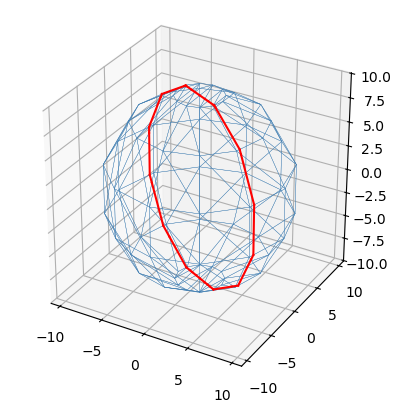

In [32]:
i = 0
file_name= "dataset/sphere_poly12/sphere_poly12ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 2, 0, 0
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

Case study #1

chess_pawn with 1344 facets
182 segments intersetion


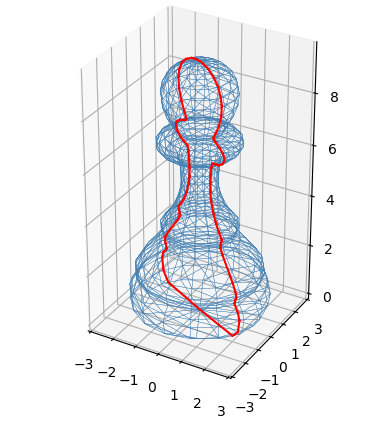

In [33]:
i = 1
file_name = "dataset/chess_pawn/chess_pawn_ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 2, 0, 0
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

Case stcudy #2

utah_teapot with 9438 facets
346 segments intersetion


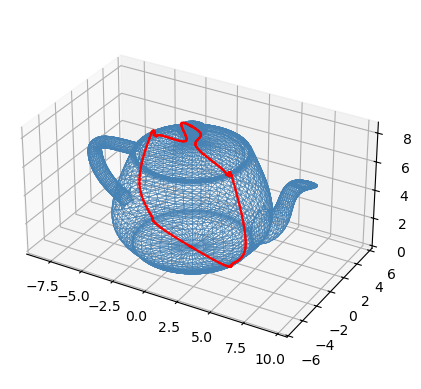

In [34]:
i = 2
file_name = "dataset/utah_teapot/utah_teapot_ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 3, 0, 0
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

Case stcudy #3

rowing_boat with 29872 facets
704 segments intersetion


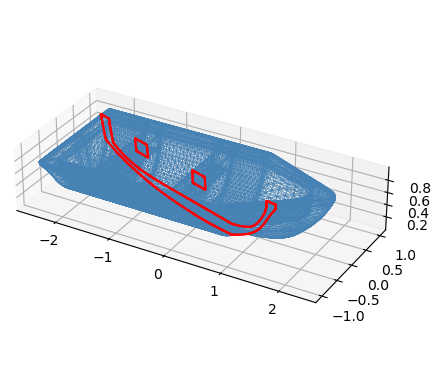

In [51]:
i = 3
file_name = "dataset/rowing_boat/rowing_boat_ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 3, 0, 0
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

Case stcudy #4

strawberry with 85040 facets
964 segments intersetion


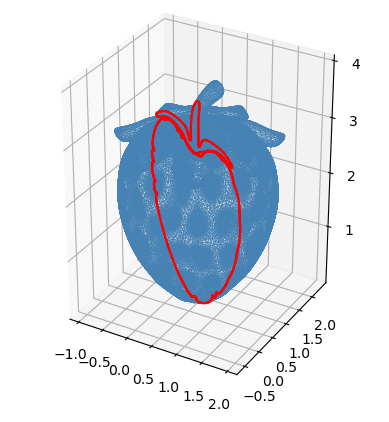

In [54]:
i = 4
file_name = "dataset/strawberry/strawberry_ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 2, 0, 2
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

Case stcudy #5

female_head with 99904 facets
671 segments intersetion


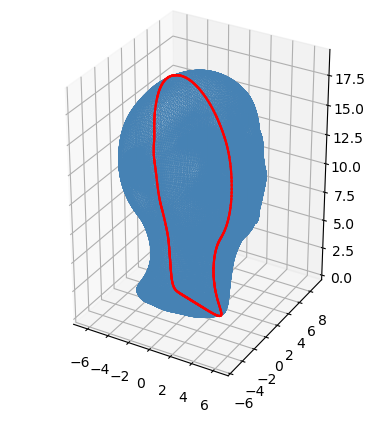

In [57]:
i = 5
file_name = "dataset/female_head/female_head_ascii.stl"
solid[i] = my_stl_module.Solid(file_name=file_name)
print(solid[i])
a[i], b[i], c[i], d[i] = 1, 2, 0, 1
plot_intersection(solid[i], a[i], b[i], c[i], d[i])

### Measurement of intersection computation time

To measure the calculation time for the intersection between a solid and a plan in Jupyter notebook, the magic command `%%timeit` can be used. It allows you to measure the execution time of an entire cell.



In [43]:
i = 0
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

sphere_poly12 with 140 facets
40 segments intersetion


In [44]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

333 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
i = 1
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

chess_pawn with 1344 facets
182 segments intersetion


In [46]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

3.11 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
i = 2
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

utah_teapot with 9438 facets
346 segments intersetion


In [48]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

20.7 ms ± 817 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
i = 3
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

rowing_boat with 29872 facets
704 segments intersetion


In [53]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

65.1 ms ± 2.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
i = 4
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

strawberry with 85040 facets
964 segments intersetion


In [56]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

194 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
i = 5
print(solid[i])
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])
print(len(line_segment_list), "segments intersetion")

female_head with 99904 facets
671 segments intersetion


In [59]:
%%timeit
line_segment_list = solid[i].intersection_with_plan(a[i], b[i], c[i], d[i])

223 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Result collect

|   name        | facets | intersection segments | mean time (ms) | std. dev. time (ms) |
|---------------|--------|-----------------------|----------------|---------------------|
| sphere_poly12 |    140 |    40                 |    0.333       |   0.00412           |
| chess_pawn    |   1344 |   182                 |    3.11        |   0.142             |
| utah_teapot   |   9438 |   346                 |   20.7         |   0.817             |
| rowing_boat   |  29872 |   704                 |   65.1         |   2.79              |
| strawberry    |  85040 |   964                 |  194           |  10.5               |
| female_head   |  99904 |   671                 |  223           |   3.11              |

In [61]:
name = [
    "sphere_poly12", "chess_pawn", "utah_teapot", 
    "rowing_boat", "strawberry", "female_head"
]
n_facets = [140, 1344, 9438, 29872, 85040, 99904]
n_seg = [40, 182, 346, 704, 964, 671]
mean_time = [0.333, 3.11, 20.7, 65.1, 194, 223]
std_dev_time = [0.00412, 0.142, 0.817, 2.79, 10.5, 3.11]

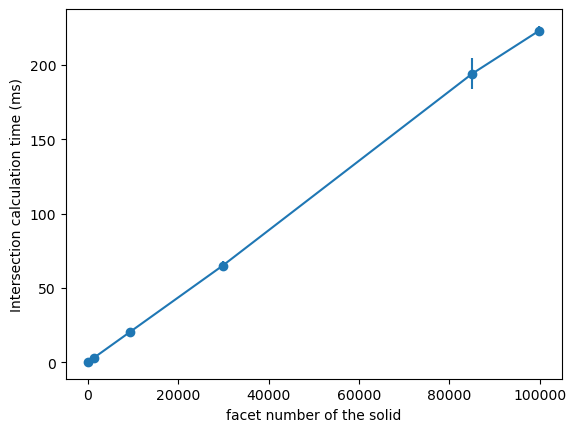

In [66]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('facet number of the solid')
ax.set_ylabel('Intersection calculation time (ms)')
#ax.plot(n_facets, mean_time)
ax.errorbar(n_facets, mean_time, yerr=std_dev_time)
ax.scatter(n_facets, mean_time)